In [3]:
import scipy
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
print("installed")

installed


In [4]:
for root, dirs, files in os.walk("E:\Mydata",topdown=False):
    for file_name in files:
        path = os.path.join(root,file_name)
        print(path)

E:\Mydata\BA_14.mat
E:\Mydata\BA_21.mat
E:\Mydata\BA_7.mat
E:\Mydata\IR_14.mat
E:\Mydata\IR_21.mat
E:\Mydata\IR_7.mat
E:\Mydata\N.mat
E:\Mydata\OR_14.mat
E:\Mydata\OR_21.mat
E:\Mydata\OR_7.mat


In [18]:
path = r'E:\Mydata\BA_7.mat'
mat = scipy.io.loadmat(path)

In [19]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:51:51 2000'), ('__version__', '1.0'), ('__globals__', []), ('X125_DE_time', array([[ 0.25305046],
       [ 0.25743138],
       [ 0.23844738],
       ...,
       [-0.09179077],
       [-0.20778092],
       [-0.29456492]])), ('X125_FE_time', array([[0.05382909],
       [0.12265636],
       [0.16251455],
       ...,
       [0.14196909],
       [0.18593636],
       [0.18963455]])), ('X125RPM', array([[1721]], dtype=uint16))])

In [20]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X125_DE_time',
 'X125_FE_time',
 'X125RPM']

In [21]:
key_name = list(mat.keys())[3]
print(key_name)

X125_DE_time


In [22]:
DE_data = mat.get(key_name)
print(DE_data)

[[ 0.25305046]
 [ 0.25743138]
 [ 0.23844738]
 ...
 [-0.09179077]
 [-0.20778092]
 [-0.29456492]]


In [23]:
fault = np.full((len(DE_data),1),file_name[:-4])
print(file_name)

OR_7.mat


In [24]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data),'fault':np.ravel(fault)})
df_temp

,DE_data,fault
0,0.253050,OR_7
1,0.257431,OR_7
2,0.238447,OR_7
3,0.218838,OR_7
4,0.191718,OR_7
...,...,...
488540,0.120371,OR_7
488541,0.019193,OR_7
488542,-0.091791,OR_7
488543,-0.207781,OR_7


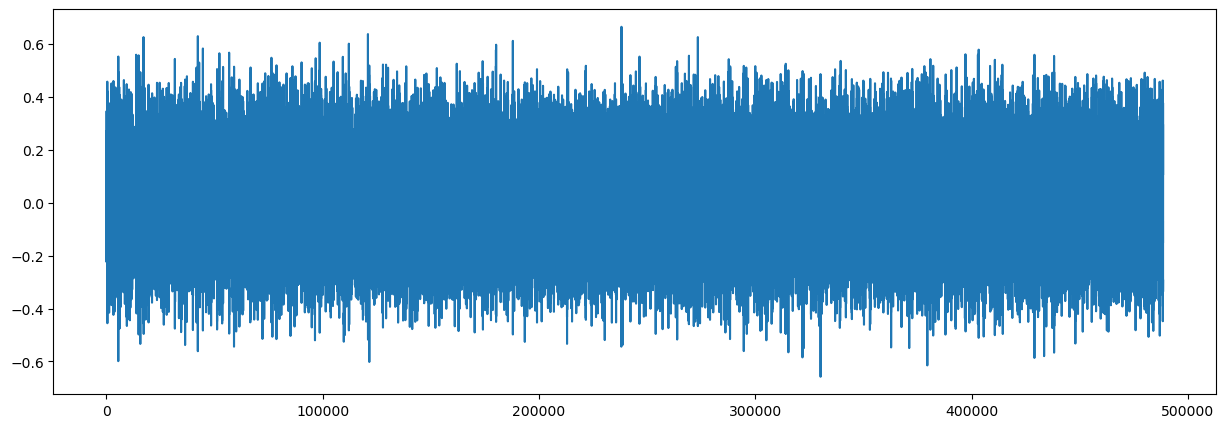

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [28]:
df = pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("E:\Mydata", topdown=False):
    for file_name in files:
        path = os.path.join(root,file_name)
        print(path)
        mat = scipy.io.loadmat(path)
        key_name = list(mat.keys())
        fault = np.full((len(DE_data),1),file_name[:-4])
        
        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data),'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('all_faults.csv',index=False)

E:\Mydata\BA_14.mat
['BA_14']
E:\Mydata\BA_21.mat
['BA_14' 'BA_21']
E:\Mydata\BA_7.mat
['BA_14' 'BA_21' 'BA_7']
E:\Mydata\IR_14.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14']
E:\Mydata\IR_21.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14' 'IR_21']
E:\Mydata\IR_7.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14' 'IR_21' 'IR_7']
E:\Mydata\N.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14' 'IR_21' 'IR_7' 'N']
E:\Mydata\OR_14.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14' 'IR_21' 'IR_7' 'N' 'OR_14']
E:\Mydata\OR_21.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14' 'IR_21' 'IR_7' 'N' 'OR_14' 'OR_21']
E:\Mydata\OR_7.mat
['BA_14' 'BA_21' 'BA_7' 'IR_14' 'IR_21' 'IR_7' 'N' 'OR_14' 'OR_21' 'OR_7']


In [29]:
df = pd.read_csv('all_faults.csv')

In [30]:
df

,DE_data,fault
0,0.253050,BA_14
1,0.257431,BA_14
2,0.238447,BA_14
3,0.218838,BA_14
4,0.191718,BA_14
...,...,...
4885445,0.120371,OR_7
4885446,0.019193,OR_7
4885447,-0.091791,OR_7
4885448,-0.207781,OR_7


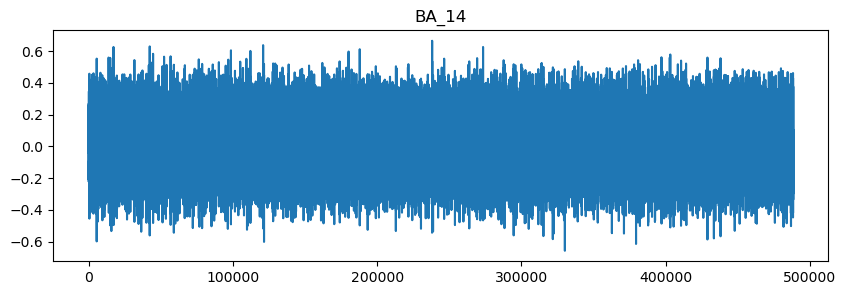

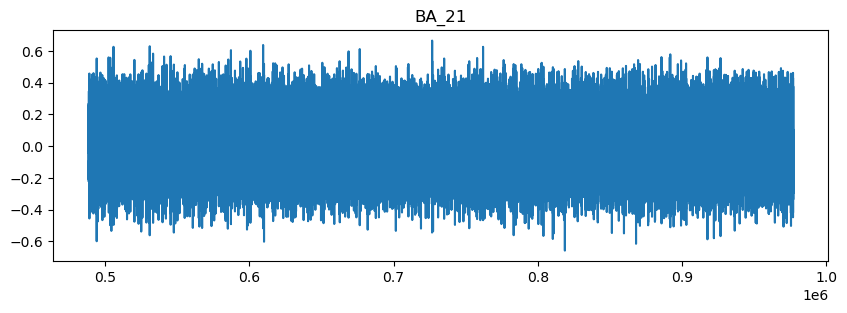

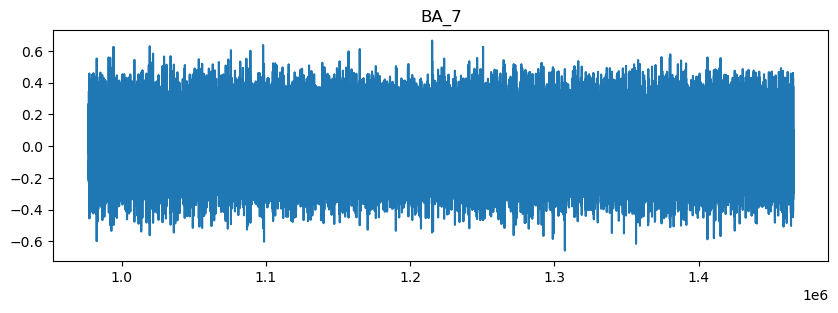

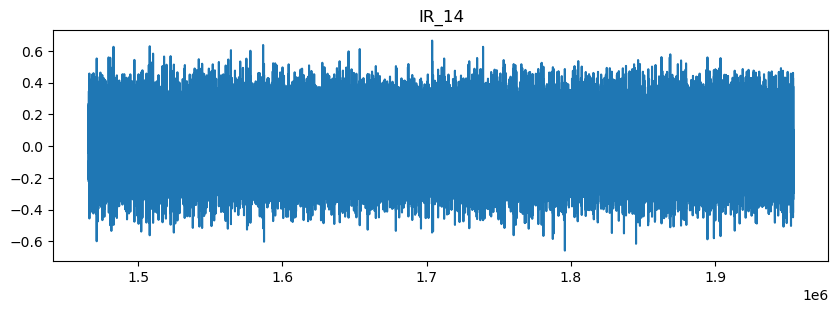

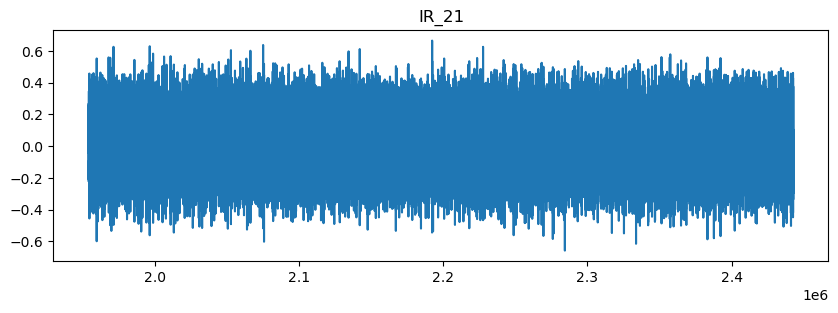

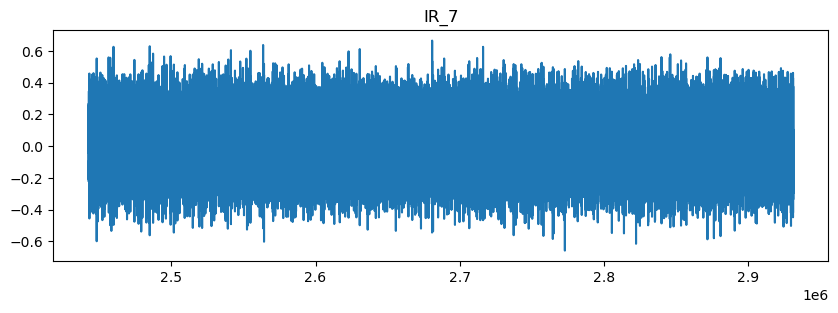

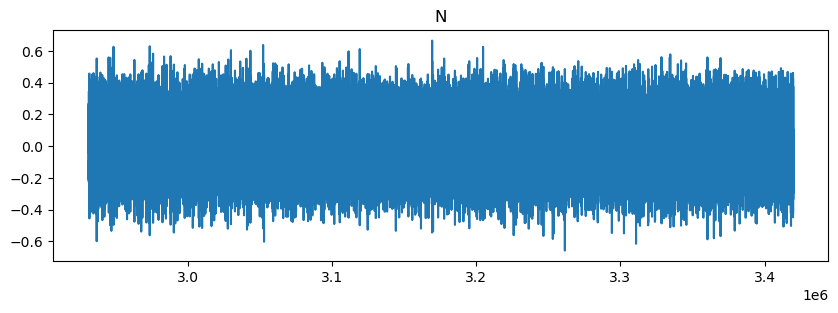

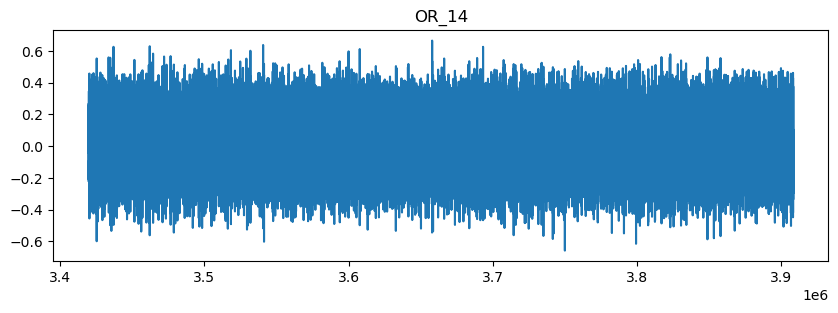

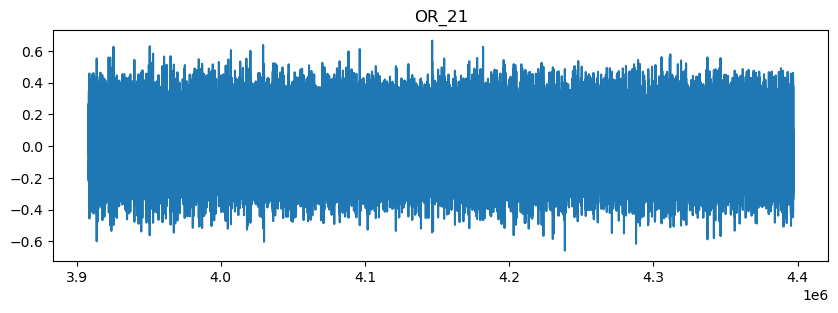

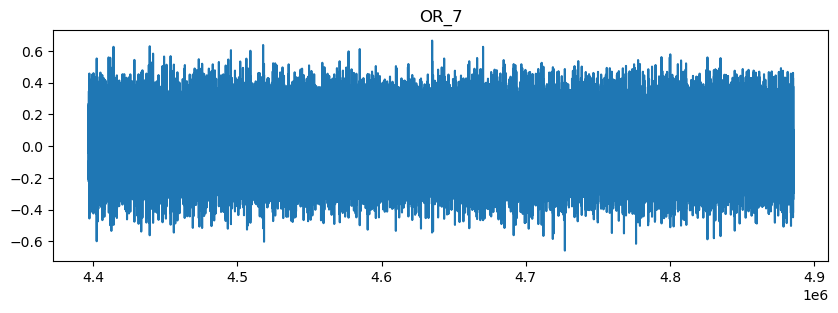

In [31]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

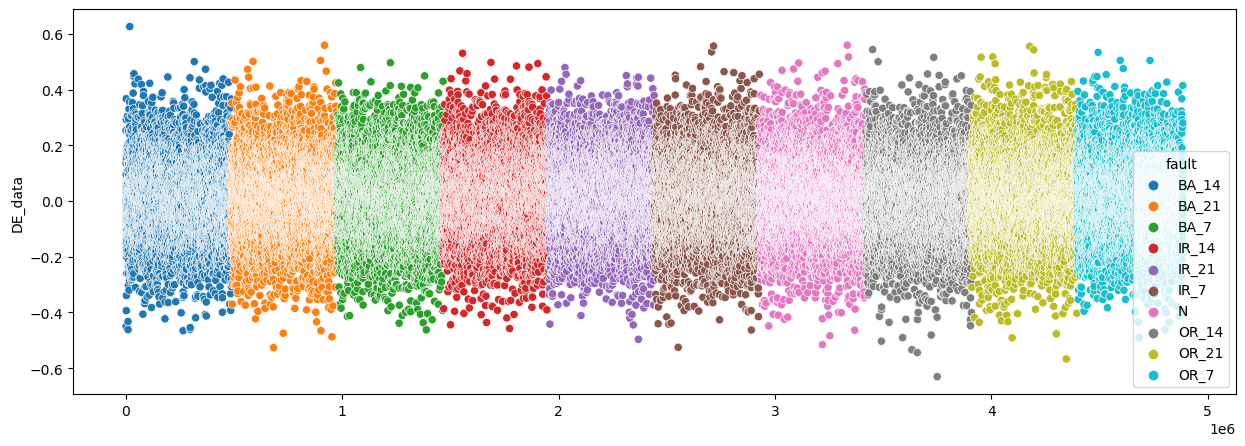

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

In [33]:
df = pd.read_csv('all_faults.csv')

In [56]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len = 4096
stride = 100

X=[]
Y=[]

for k in df['fault'].unique():
    df_temp_2 = df[df['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X = np.array(X)
X = X.reshape((X.shape[0],64,64,1))

Y = np.array(Y)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [57]:
X.shape

(48450, 64, 64, 1)

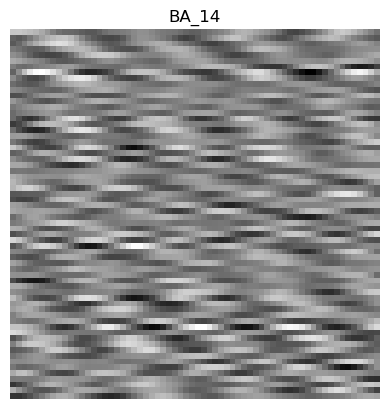

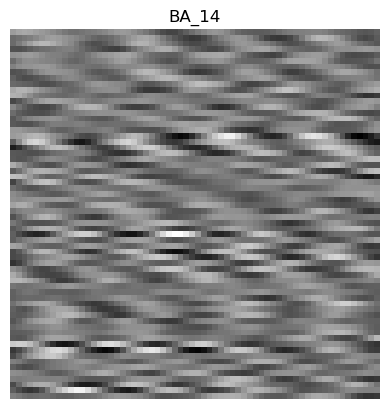

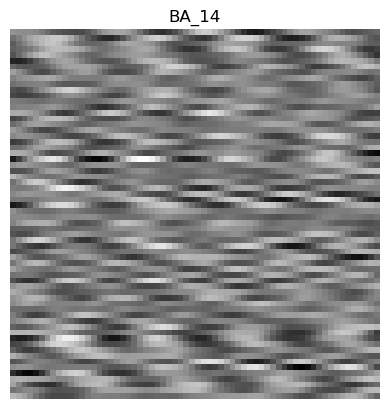

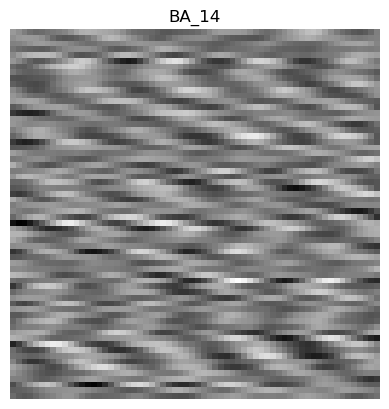

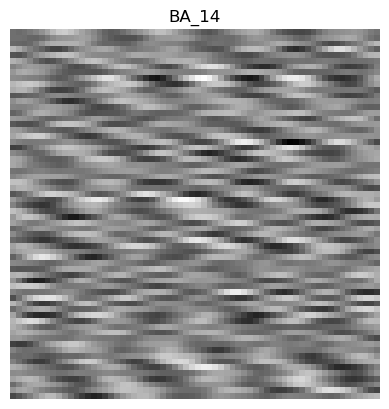

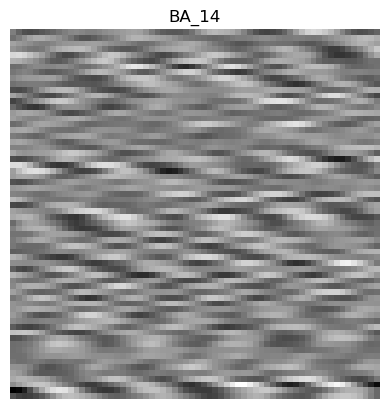

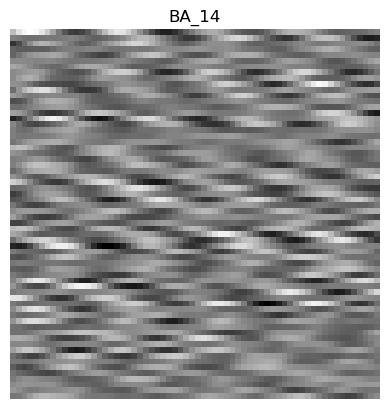

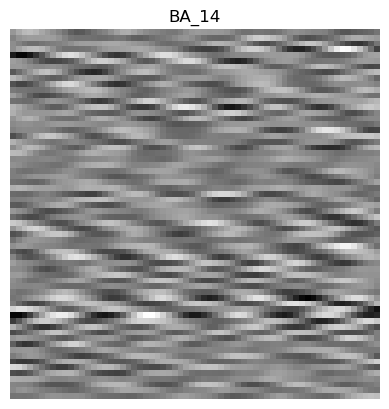

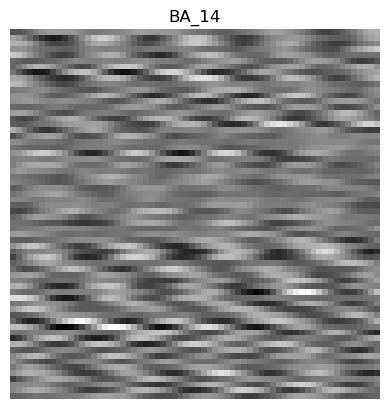

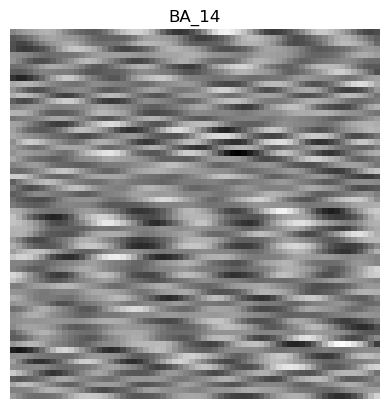

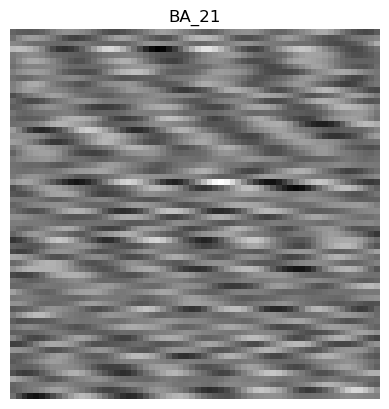

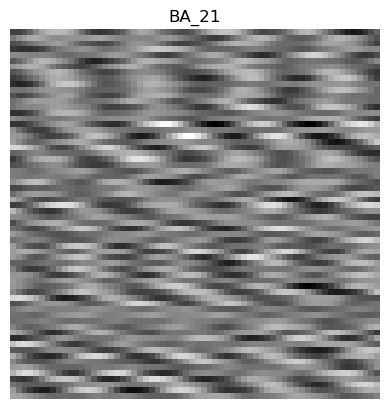

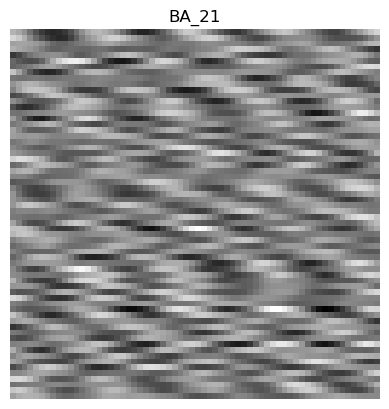

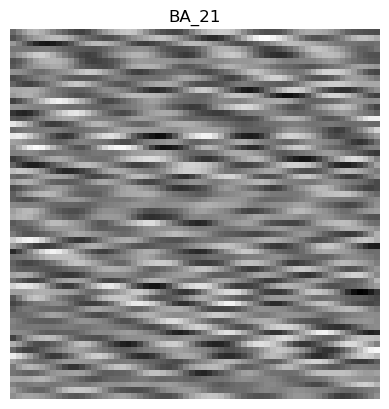

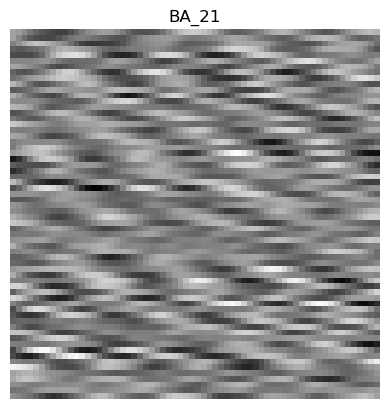

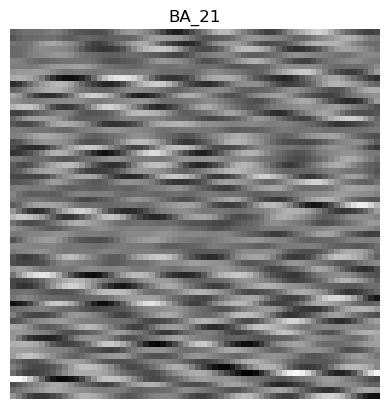

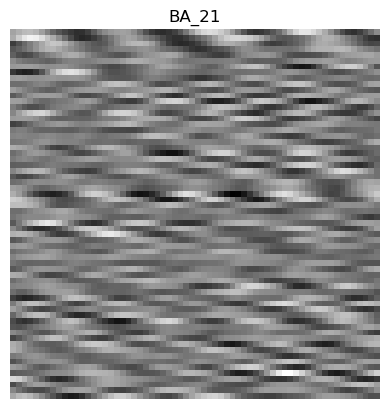

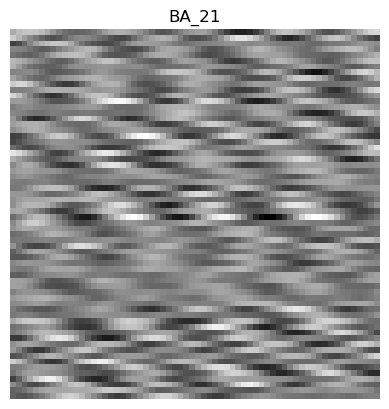

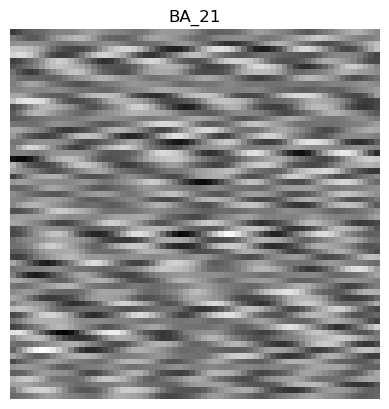

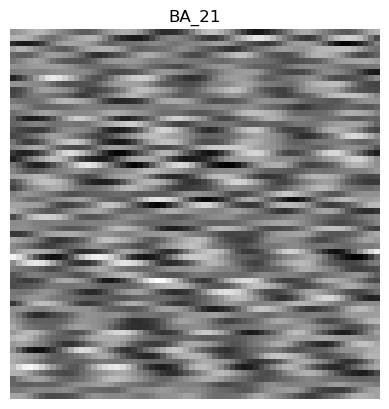

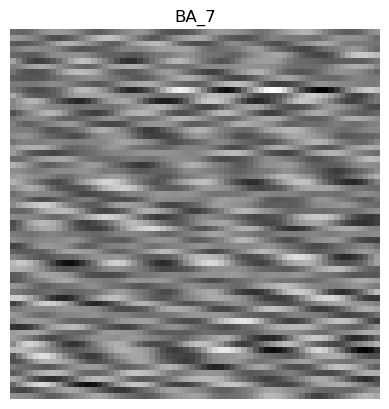

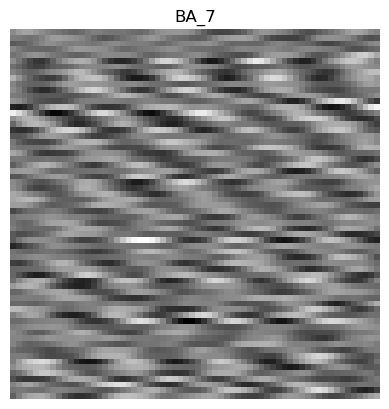

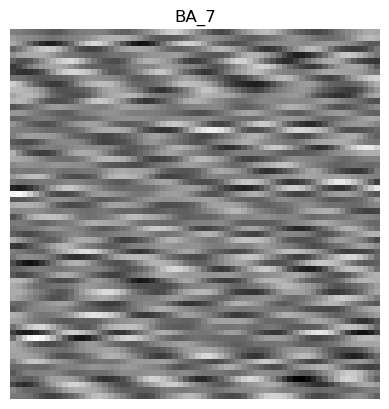

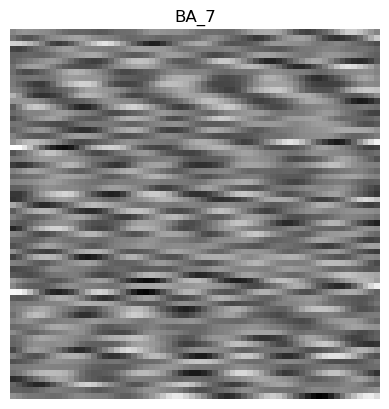

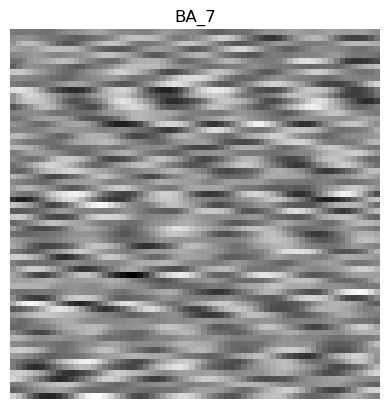

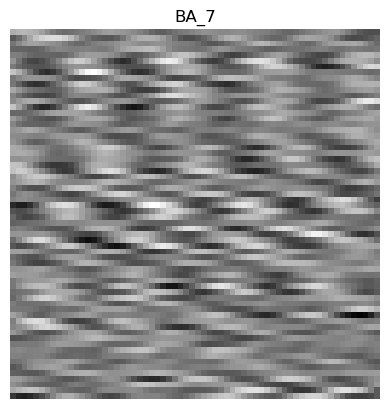

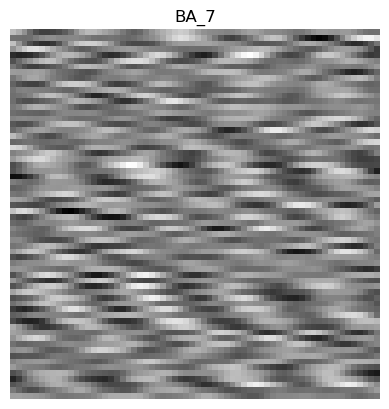

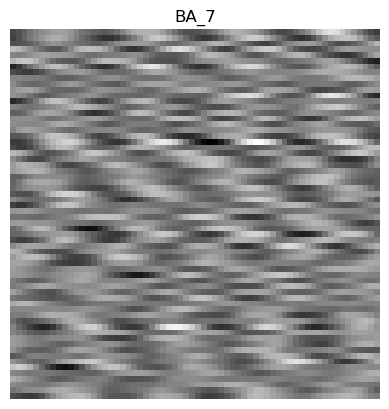

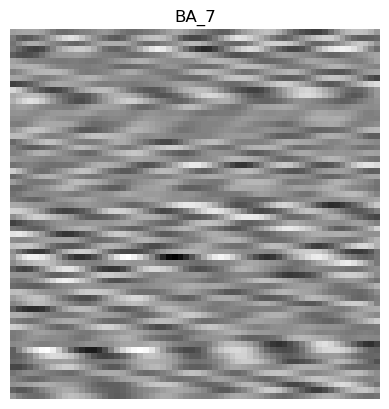

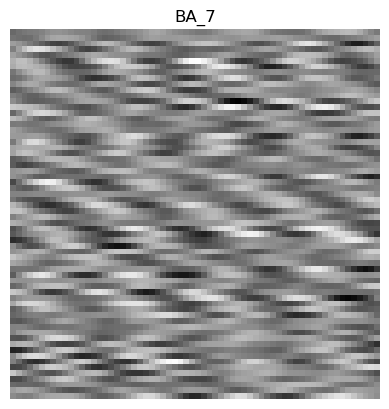

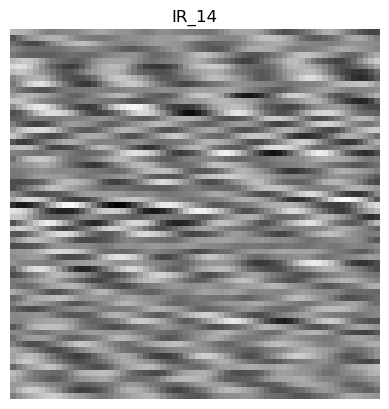

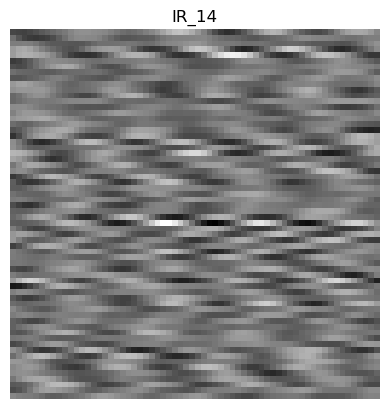

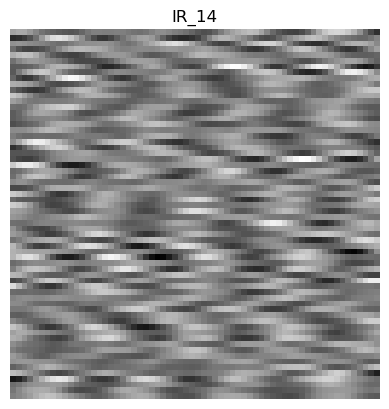

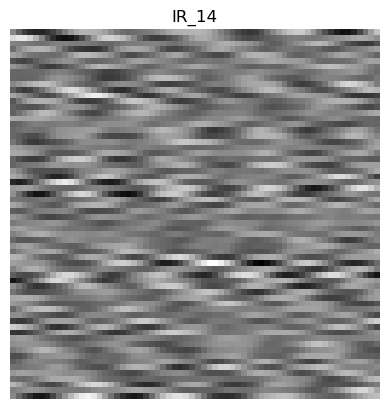

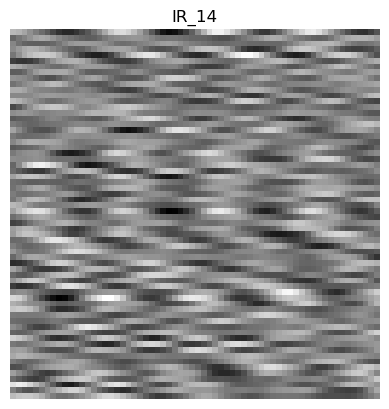

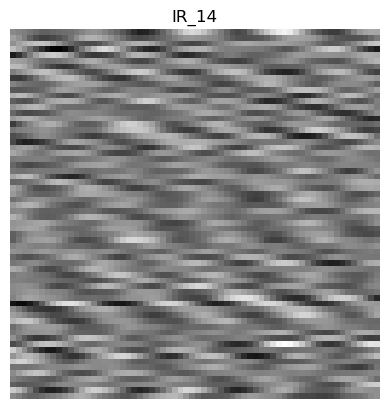

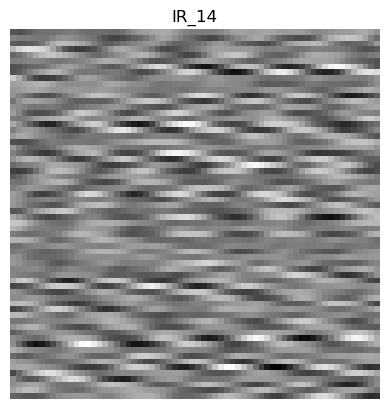

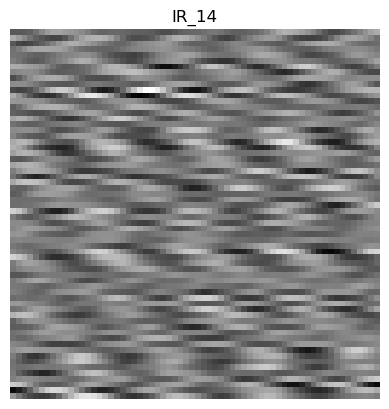

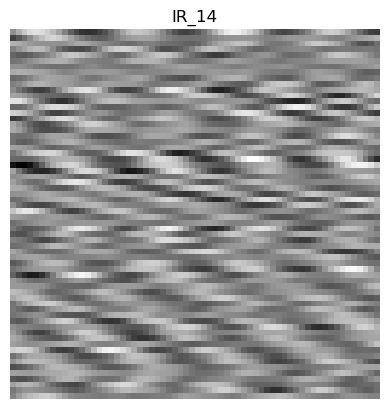

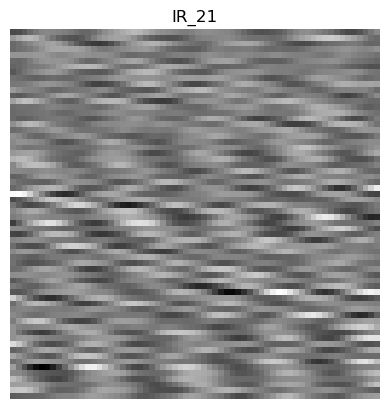

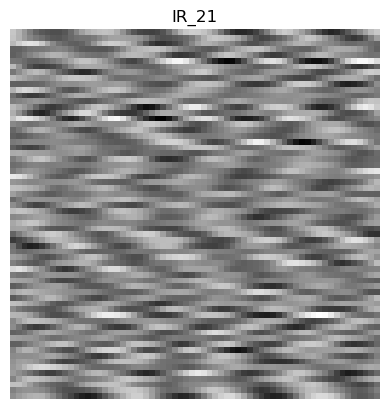

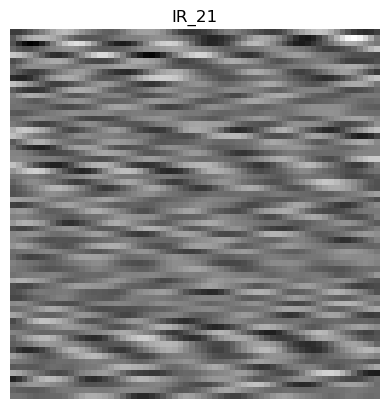

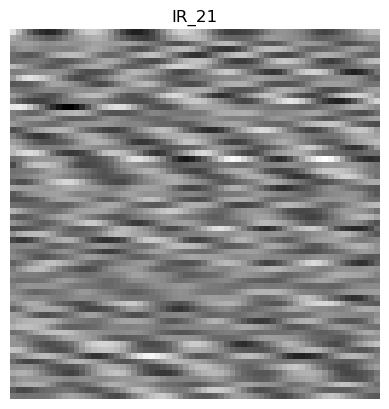

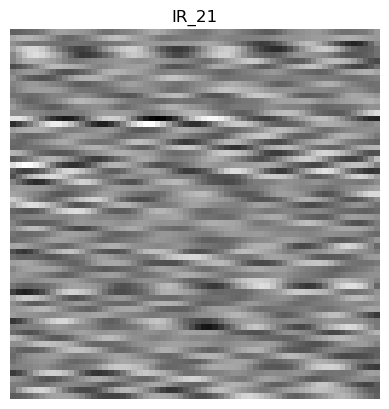

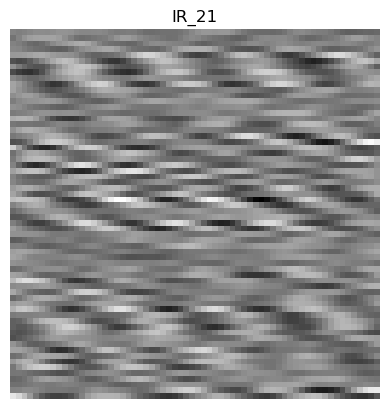

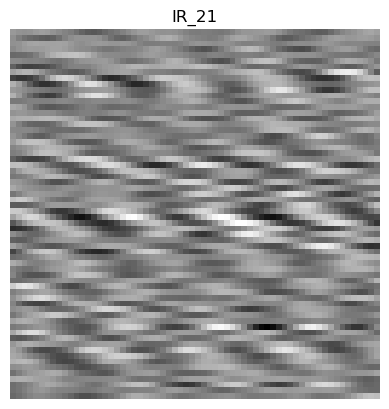

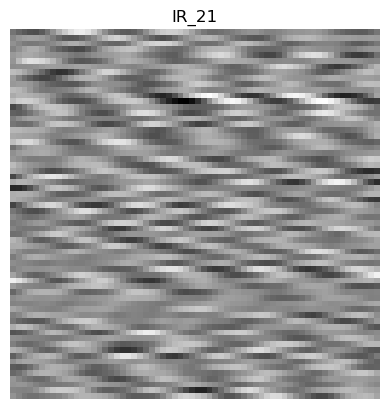

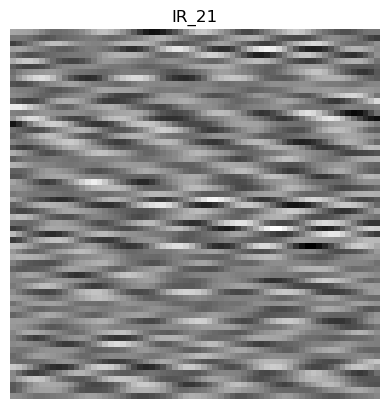

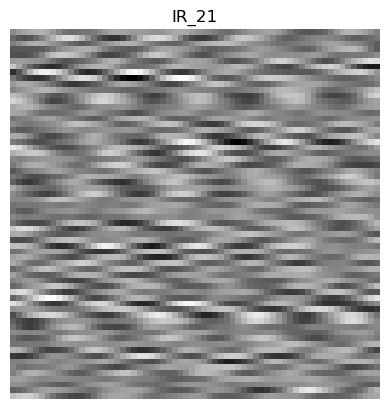

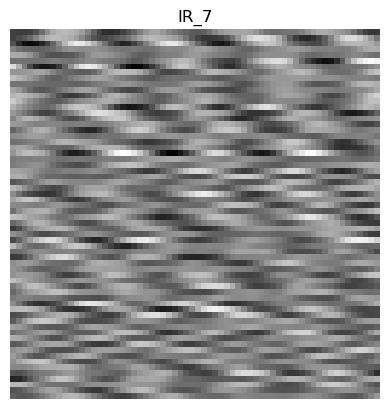

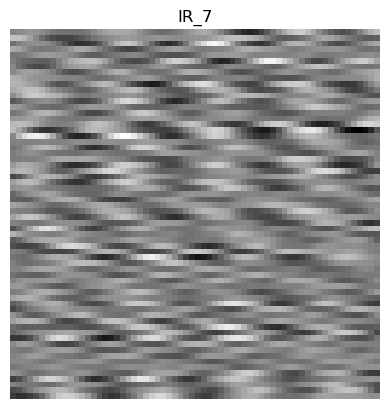

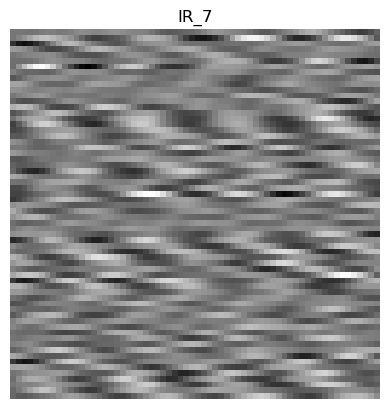

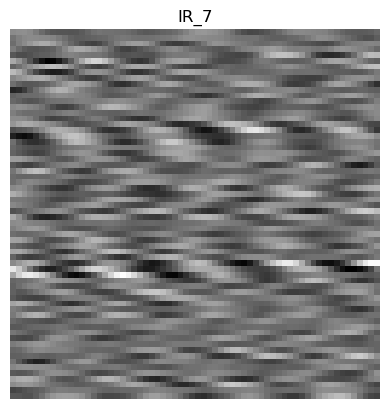

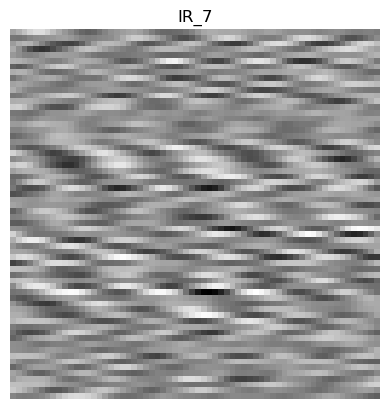

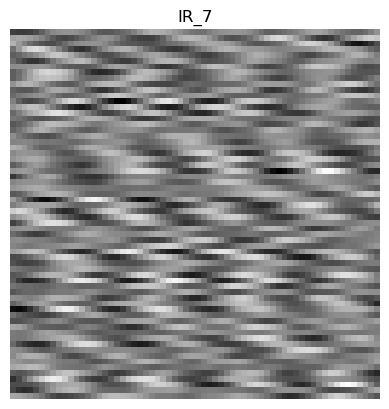

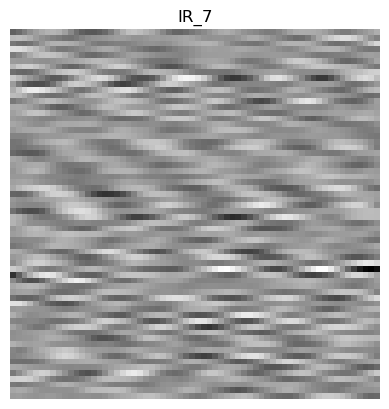

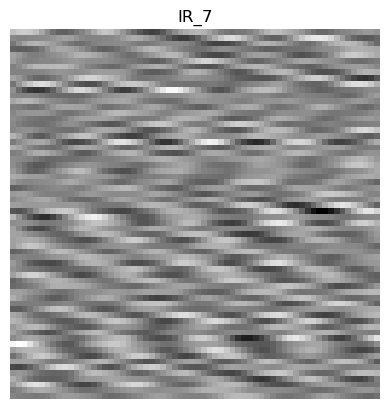

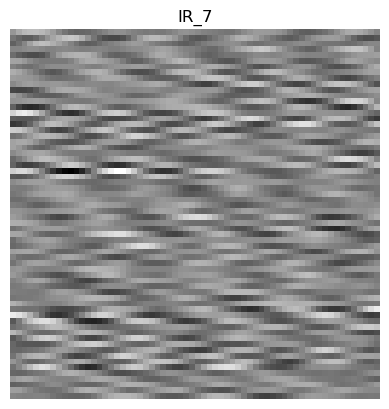

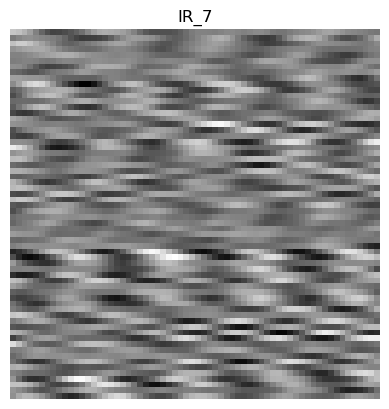

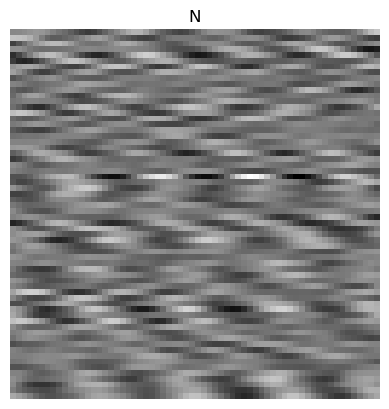

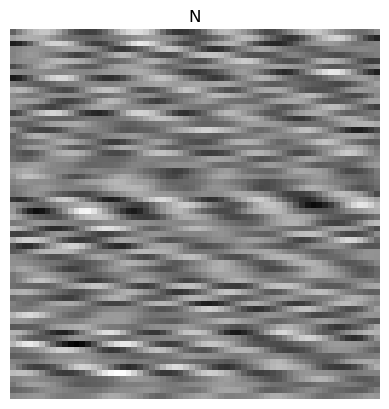

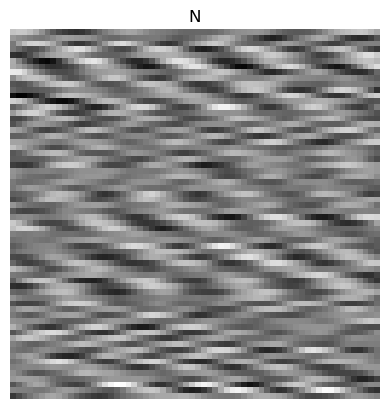

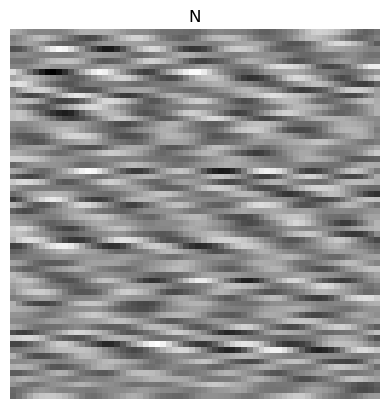

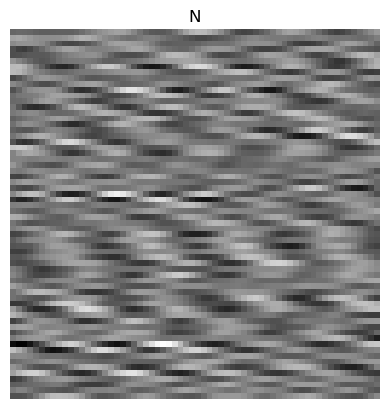

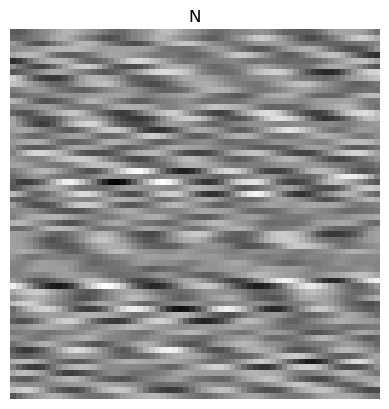

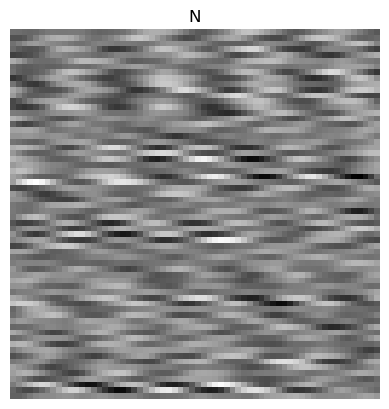

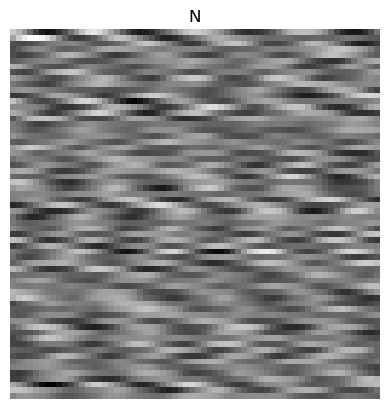

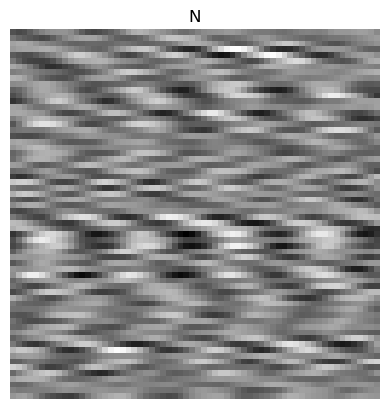

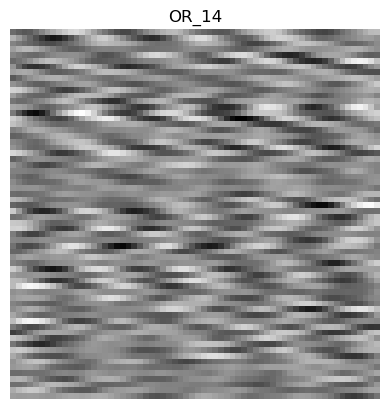

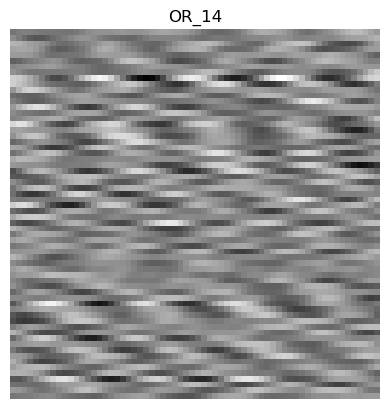

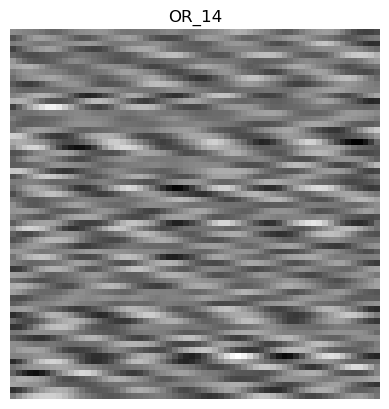

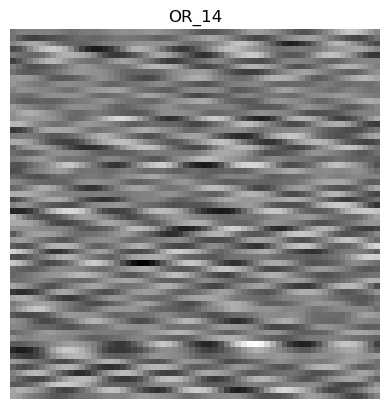

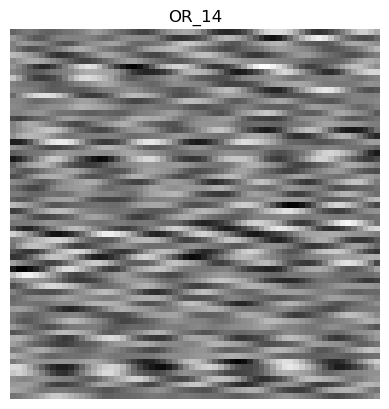

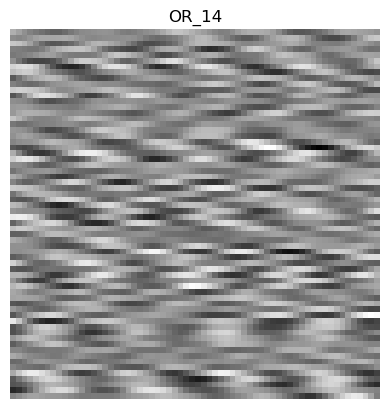

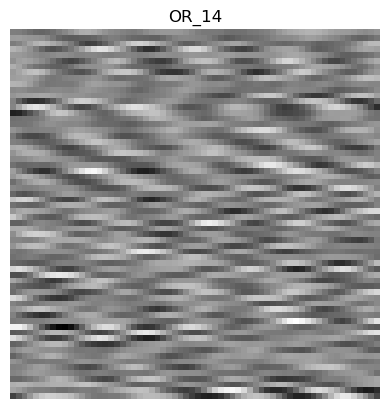

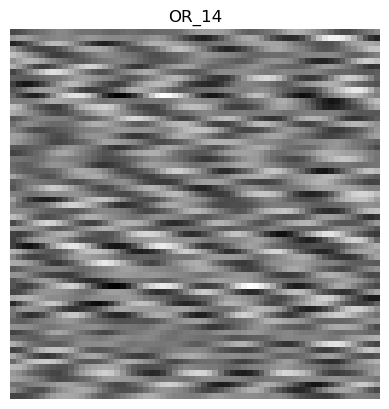

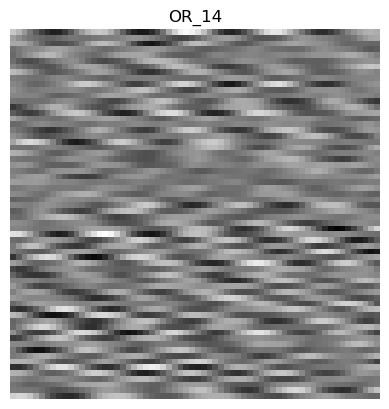

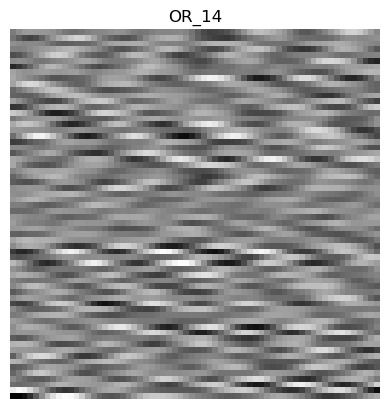

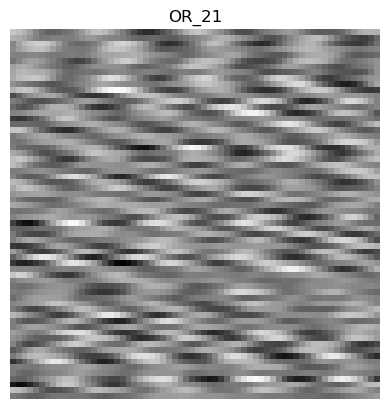

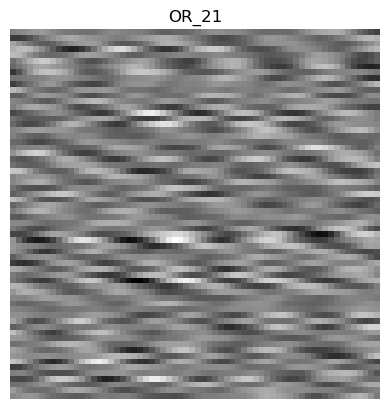

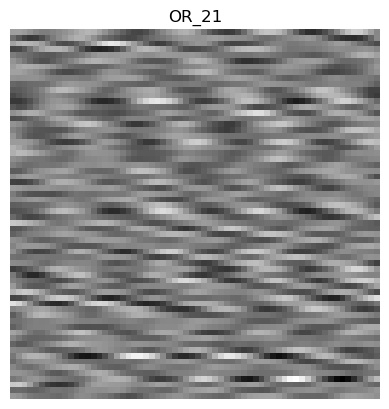

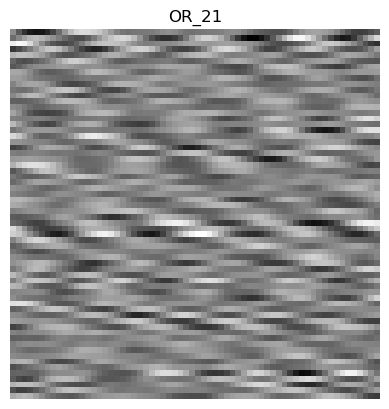

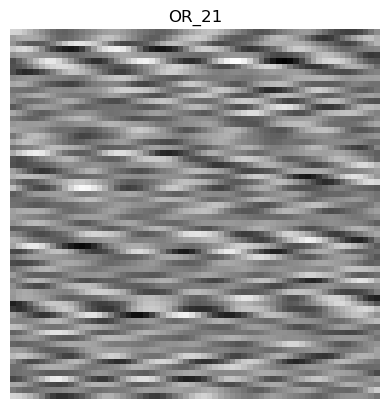

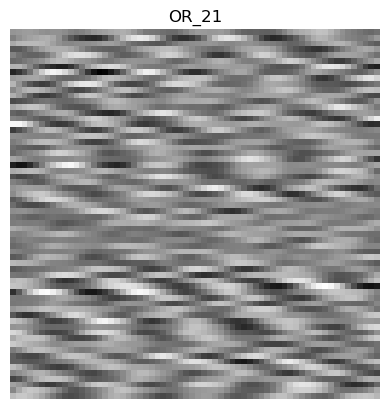

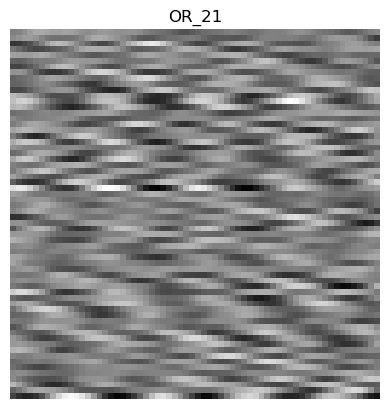

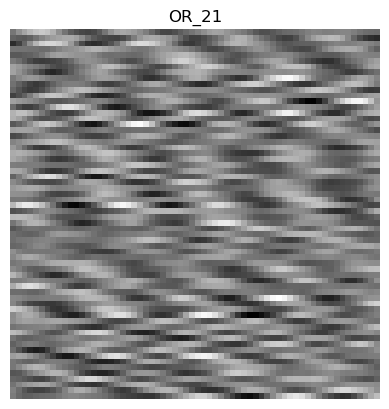

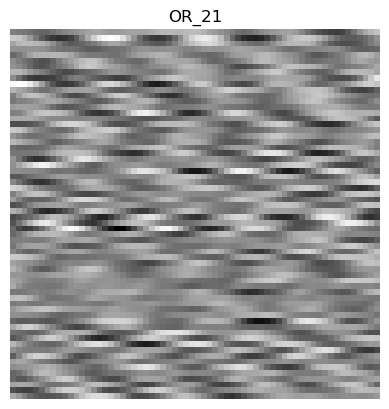

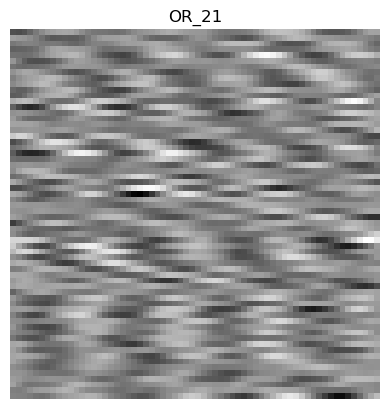

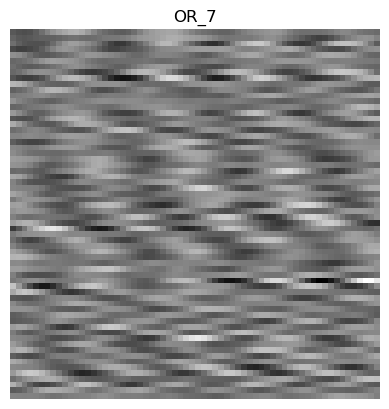

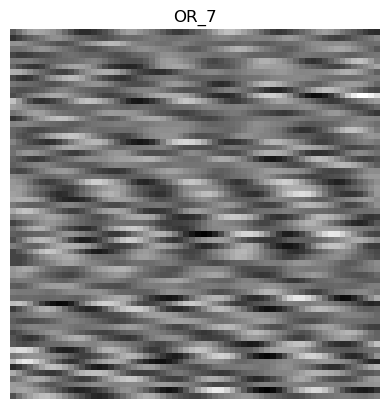

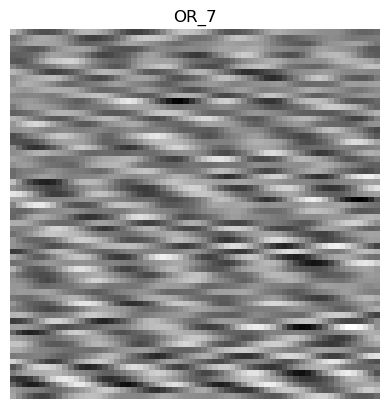

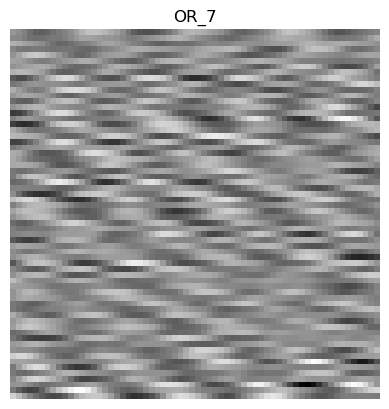

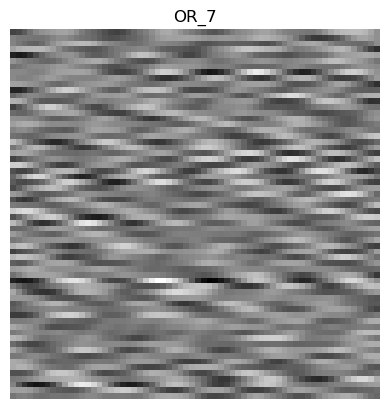

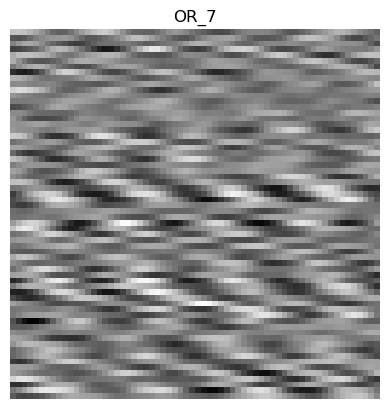

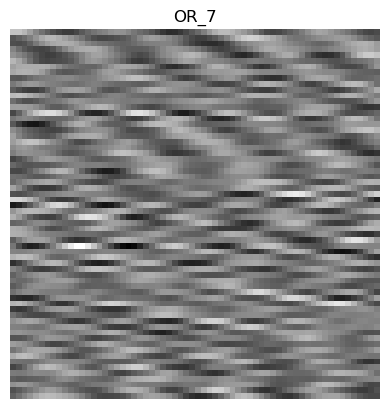

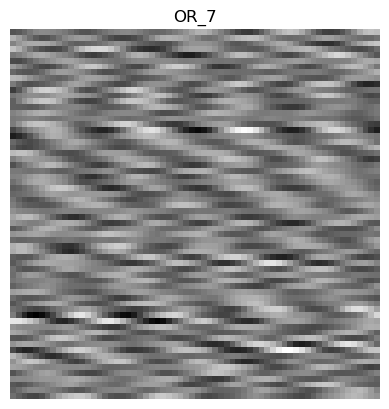

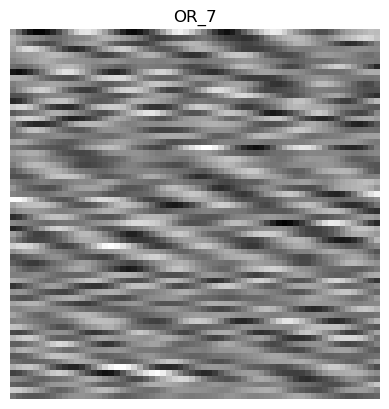

In [59]:
from matplotlib.pyplot import imread

count = 0
for idx in range(0,48450,500):
    img=X[idx]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(Y[idx])
    plt.show()
    count = count+1

In [62]:
print(count)

97
